In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

# Importing Data

In [6]:
cwd_path = os.getcwd()
print("My current directory is : " + cwd_path)
path = os.path.dirname(cwd_path)
print("Parent directory", path)

My current directory is : C:\Users\iavta\Natural Language Processing\Economics\ECB\Notebooks
Parent directory C:\Users\iavta\Natural Language Processing\Economics\ECB


In [66]:
# We're importing consolidated data.
df = pd.read_csv (path+"\\Data - Clean\\"+"ECB_Speeches_EN_gdbyDate.csv")
df.head()

,date,speakers,title,subtitle,contents
0,2021-05-27,Isabel Schnabel Luis de Guindos,Societal responsibility and central bank indep...,"Keynote speech by Isabel Schnabel, Member of t...",SPEECH Societal responsibility and central...
1,2021-05-19,Fabio Panetta,At the edge of tomorrow: preparing the future ...,"Introductory remarks by Fabio Panetta, Member ...",SPEECH At the edge of tomorrow: preparing ...
2,2021-05-06,Christine Lagarde,Towards a green capital markets union for Europe,"Speech by Christine Lagarde, President of the ...",SPEECH Towards a green capital markets uni...
3,2021-04-29,Frank Elderson,All the way to zero: guiding banks towards a c...,"Keynote speech by Frank Elderson, Vice-Chair o...",SPEECH All the way to zero: guiding banks ...
4,2021-04-26,Philip R. Lane Fabio Panetta,Maximising the user value of statistics: lesso...,"Speech by Philip R. Lane, Member of the Execut...",SPEECH Maximising the user value of statis...


## LSA (PCA, using Scikit-learn)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

In [8]:
corpus=df["contents"]
corpus.shape

(1820,)

In [10]:
vectorizer=TfidfVectorizer(tokenizer=casual_tokenize)

In [11]:
model=vectorizer.fit_transform(corpus)

In [12]:
DataFrame_tf_idf=pd.DataFrame(model.toarray())

In [13]:
(n_speeches,n_words)=DataFrame_tf_idf.shape 
# each row is a speech. Each column is the tf_idf for a word.
DataFrame_tf_idf.shape 

(1820, 71490)

In [14]:
vectorizer.stop_words_ # no words were ignored?

set()

In [15]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=10)

In [36]:
pca_fit=pca.fit(DataFrame_tf_idf) # sklearn PCA already normalizes

In [37]:
pca_topic_vectors=pca_fit.transform(DataFrame_tf_idf)

In [38]:
columns=["Topic{}".format(i) for i in range(0,pca.n_components)]
rows=["Speech{}".format(i) for i in range(0,n_speeches)]
pca_topic_vectors=pd.DataFrame(pca_topic_vectors,columns=columns,index=rows)

In [39]:
pca_topic_vectors

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
Speech0,-0.020437,0.162395,0.054240,-0.019095,0.059019,-0.015822,-0.020717,0.024620,0.035377,-0.060532
Speech1,0.215505,0.109901,0.092286,0.261698,0.103668,0.119865,0.178366,-0.037265,0.198590,0.014061
Speech2,0.095124,0.148962,0.066207,0.070746,0.005831,0.022504,0.015484,-0.008260,-0.067886,-0.016035
Speech3,0.105305,0.057996,0.049753,0.144582,-0.039898,0.023982,-0.138220,-0.022121,-0.019360,0.027836
Speech4,0.015724,0.246798,0.078131,-0.060094,0.115927,-0.010988,0.064569,-0.008435,0.006357,-0.051808
...,...,...,...,...,...,...,...,...,...,...
Speech1815,-0.097682,-0.171419,-0.053499,-0.045323,0.028092,-0.015688,-0.026786,0.123122,0.085404,0.012028
Speech1816,-0.078265,-0.168246,-0.050165,-0.041087,0.040521,-0.013561,-0.034606,0.094340,0.121048,-0.012973
Speech1817,-0.092485,-0.124915,-0.039928,-0.037809,0.046532,-0.027090,0.027585,0.093808,0.051198,-0.006896
Speech1818,-0.090200,-0.050556,-0.022890,-0.037051,-0.006000,-0.010907,0.048703,0.089625,0.018359,0.078517


In [40]:
vectorizer.vocabulary_

{'speech': 60443,
 'societal': 59875,
 'responsibility': 55594,
 'and': 8560,
 'central': 15183,
 'bank': 11387,
 'independence': 35774,
 'keynote': 38698,
 'by': 14229,
 'isabel': 37666,
 'schnabel': 57670,
 ',': 30,
 'member': 42970,
 'of': 46849,
 'the': 63537,
 'executive': 26918,
 'board': 13247,
 'ecb': 23333,
 'at': 10122,
 '“': 71466,
 'viii': 67896,
 '.': 162,
 'new': 45497,
 'paradigm': 48391,
 'workshop': 69925,
 '”': 71467,
 'organised': 47494,
 'forum': 29392,
 'economy': 23609,
 'frankfurt': 29573,
 'am': 8282,
 'main': 41868,
 '27': 3743,
 'may': 42651,
 '2021': 3137,
 'banking': 11503,
 'in': 35459,
 'times': 63949,
 'shifting': 58944,
 'concerns': 17103,
 'best': 12617,
 'contribution': 18047,
 'that': 63532,
 'banks': 11541,
 'can': 14509,
 'make': 41906,
 'to': 64038,
 'economic': 23576,
 'prosperity': 52020,
 'is': 37663,
 'maintain': 41877,
 'stable': 60855,
 'prices': 51254,
 ':': 6297,
 'this': 63694,
 'was': 68729,
 'broad': 13793,
 'consensus': 17523,
 'among':

In [41]:
index_terms,terms=zip(*sorted(zip(vectorizer.vocabulary_.values(),vectorizer.vocabulary_.keys())))
# * removes one outer dimension

In [42]:
len(terms)

71490

In [43]:
weights=pd.DataFrame(pca.components_,columns=terms,index=columns)

In [44]:
weights

,!,"""",#,#10,#11-39,#europeunited,$,%,&,',...,ﬁat-currency,ﬁnance,ﬁnanced,ﬁnancial,ﬁnancially,ﬁrms,ﬁrst,ﬂowing,ﬂows,�
Topic0,0.000727,-0.022216,0.000124,0.000018,-7.489166e-06,0.000042,-0.000333,-0.014465,0.000047,-0.005163,...,1.409495e-07,-0.000005,-0.000011,0.000031,-0.000011,0.000126,-0.000012,-2.658751e-06,-0.000016,0.000007
Topic1,-0.000976,-0.071727,-0.000299,-0.000055,1.203045e-05,0.000250,0.000843,0.019677,0.008843,-0.012823,...,4.194251e-05,0.000036,0.000062,0.000195,0.000062,0.000170,0.000103,1.805978e-05,0.000108,0.000323
Topic2,-0.000244,-0.024219,0.000093,0.000012,8.380596e-07,0.000117,0.000219,-0.005811,0.003202,-0.004857,...,1.526989e-05,0.000011,0.000011,0.000087,0.000011,0.000136,0.000022,5.481291e-06,0.000033,0.000100
Topic3,0.007086,-0.051166,0.002176,0.000343,-1.834958e-05,0.000186,0.001124,-0.078654,0.002162,-0.008135,...,-1.158352e-05,0.000009,-0.000047,-0.000052,-0.000047,0.000048,0.000112,4.361605e-06,0.000026,0.000537
Topic4,-0.002021,0.052949,0.000479,0.000092,1.581159e-06,0.000159,0.000081,-0.025456,0.007767,0.003283,...,4.053716e-05,0.000036,-0.000035,0.000198,-0.000035,0.000423,-0.000262,1.815172e-05,0.000109,-0.000363
Topic5,0.005909,-0.042154,0.000532,0.000102,-2.032235e-05,0.000133,-0.002047,0.069527,0.001445,-0.008640,...,-2.562934e-05,-0.000034,0.000028,0.000009,0.000028,0.000189,0.000065,-1.679056e-05,-0.000101,-0.001547
Topic6,0.002881,0.122387,0.002064,0.000404,-1.821541e-06,0.000085,-0.000747,0.042044,0.008682,0.017241,...,3.011202e-05,0.000054,0.000027,0.000088,0.000027,0.000265,-0.000145,2.715630e-05,0.000163,-0.000982
Topic7,0.005339,0.291960,-0.000617,-0.000116,-2.114106e-05,0.000130,-0.001224,-0.122550,-0.008907,0.043413,...,3.585329e-05,0.000009,-0.000104,-0.000090,-0.000104,0.000041,0.000082,4.552621e-06,0.000027,0.000943
Topic8,-0.003226,0.049750,0.002134,0.000382,-2.305889e-05,-0.000484,-0.000354,-0.033747,-0.011542,0.009086,...,-3.023195e-05,-0.000002,-0.000116,-0.000357,-0.000116,-0.000380,-0.000201,-9.771927e-07,-0.000006,0.000740
Topic9,-0.002548,0.173816,-0.002210,-0.000477,-4.721687e-05,-0.000168,0.000812,0.011852,0.003945,0.030074,...,-9.003416e-05,0.000061,-0.000096,-0.000094,-0.000096,0.000373,-0.000170,3.047808e-05,0.000183,0.002185


In [51]:
# Tokenization put everything in lower letters
# BOW analysis will just
weights1=weights["inflation is important".split()]
sentence1=weights1.T.sum()
sentence1.nlargest(n=5)

Topic5    0.194433
Topic9    0.179109
Topic8    0.148066
Topic7    0.089997
Topic1    0.079506
dtype: float64

In [55]:
weights.loc["Topic5"].nlargest(15)

euro            0.182397
slides          0.177681
inflation       0.162987
our             0.138454
we              0.130774
presentation    0.121686
area            0.113608
download        0.105386
growth          0.091589
sepa            0.091359
banknotes       0.071031
annex           0.070265
%               0.069527
payments        0.066405
to              0.064078
Name: Topic5, dtype: float64

In [77]:
weights2=weights["growth is low".split()]
sentence2=weights2.T.sum()
sentence2.nlargest(n=5)

Topic9    0.187417
Topic5    0.176307
Topic6    0.094202
Topic1    0.075788
Topic2   -0.006565
dtype: float64

In [79]:
weights.loc["Topic9"].nlargest(15) 
# sometimes is hard to pinpoint the exact theme of the topic.
# we could have used some stop words, removing "and", "in", etc.

and          0.210505
in           0.202726
"            0.173816
of           0.143974
growth       0.133367
inflation    0.122002
ccps         0.119653
to           0.111022
price        0.104143
clearing     0.102450
stability    0.083731
ccp          0.082219
cyber        0.078510
labour       0.074524
t2s          0.066805
Name: Topic9, dtype: float64

In [80]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels 
# kernels are similarity measures: bigger values, greater similarity (smaller distance)
# distances metric(mat_(3,2), mat_(2,2) ) = mat_(3,1)

In [81]:
np.array([sentence1]).shape, pca_topic_vectors.shape

((1, 10), (1820, 10))

In [82]:
distances_values_1=pairwise_distances(np.array([sentence1]),pca_topic_vectors, metric='l2')
distances_values_2=pairwise_distances(np.array([sentence2]),pca_topic_vectors, metric='l2')

In [83]:
distances_values_1.shape, distances_values_2.shape

((1, 1820), (1, 1820))

In [84]:
distances_values_1[0,:]

array([0.46547833, 0.68342158, 0.51788307, ..., 0.45266295, 0.3688078 ,
       0.41070181])

In [108]:
np.linspace(0, 1820, 10, endpoint=False)

array([   0.,  182.,  364.,  546.,  728.,  910., 1092., 1274., 1456.,
       1638.])

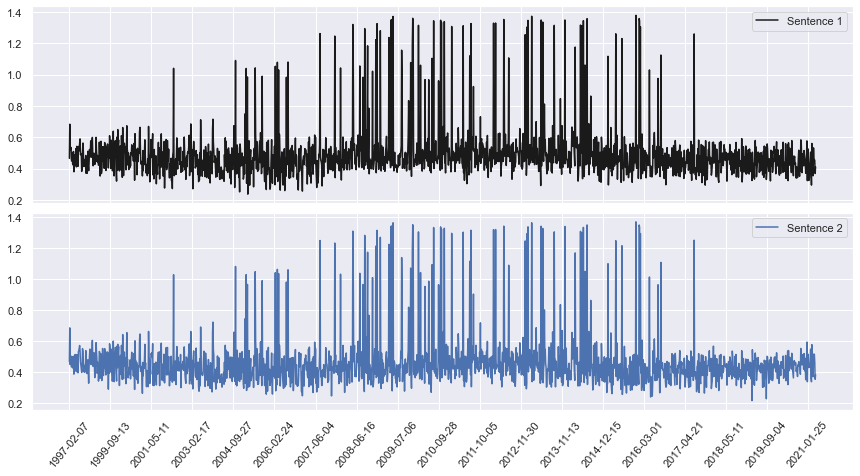

In [122]:
fig, ax = plt.subplots(2, 1,sharex=True)

ax[0].plot(distances_values_1[0,:],"k",label="Sentence 1")

ax[1].plot(distances_values_2[0,:],"b",label="Sentence 2")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.05)

xlist= list(range(0, 1820, 100)) #[0,250,500,750,1000,1250,1500,1750]
timelist=sorted(df["date"]) 
# we need to sort, since the dates are reversed.
# If this were a big data set, I would have sorted in the DataFrame itself, using Pandas(faster).

plt.xticks(xlist,[timelist[i] for i in xlist],rotation=50)
ax[0].legend(loc="best")
ax[1].legend(loc="best");
#fig.tight_layout();

We can see that since the financial crisis of 2007, the ECB made several interventions about inflation and growth, up until 2016.

Note: We have to be carefull in comparing similarities values of different sentences, in a BOW analysis. Almost like in linear regression, if I increase the number of (common) words in the sentence, it's very likely to increase its similarity. We need to do a relative comparison. 